In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d iamhungundji/dysarthria-detection
!unzip *.zip

 92% 143M/155M [00:00<00:00, 168MB/s]
100% 155M/155M [00:01<00:00, 151MB/s]
Archive:  dysarthria-detection.zip
  inflating: torgo_data/data.csv     
  inflating: torgo_data/dysarthria_female/F01_Session1_0001.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0002.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0004.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0006.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0007.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0008.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0013.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0015.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0017.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0018.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0021.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0022.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0024

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/torgo_data/data.csv')

In [4]:
df.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


In [5]:
df.tail()

,is_dysarthria,gender,filename
1995,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0144.wav
1996,dysarthria,male,torgo_data/dysarthria_male/M02_Session1_0005.wav
1997,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0040.wav
1998,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0260.wav
1999,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0145.wav


In [6]:
df.shape

(2000, 3)

In [7]:
df['is_dysarthria'].value_counts()

non_dysarthria    1000
dysarthria        1000
Name: is_dysarthria, dtype: int64

In [8]:
df.groupby('is_dysarthria').count()['gender']

is_dysarthria
dysarthria        1000
non_dysarthria    1000
Name: gender, dtype: int64

In [9]:
import librosa
import librosa.display

In [10]:
def waveplot(path, is_dysarthria, gender):
  x, sr = librosa.load(path)
  plt.figure(figsize = (20, 6))
  librosa.display.waveshow(x, sr = sr)
  plt.title("Waveplot of " +is_dysarthria+ ' '+gender)
  plt.show()

In [11]:
def mfcc(path, is_dysarthria, gender):
  x, sr = librosa.load(path)
  plt.figure(figsize = (20,6))
  plt.title("MFCC spectral of " +is_dysarthria+ ' '+gender)
  mfccs = librosa.feature.mfcc(y = x, sr = sr)
  librosa.display.specshow(mfccs, sr = sr, x_axis = 'time')
  plt.show()

In [12]:
def spectogram(path, is_dysarthria, gender):
  x, sr = librosa.load(path)
  plt.figure(figsize = (20,6))
  plt.title("Mel spectogram " +is_dysarthria+ ' '+gender)
  mel_spec = librosa.feature.melspectrogram(y = x, sr = sr)
  librosa.display.specshow(mel_spec, sr = sr, x_axis = 'time')
  plt.show()

In [13]:
import IPython.display as ipd

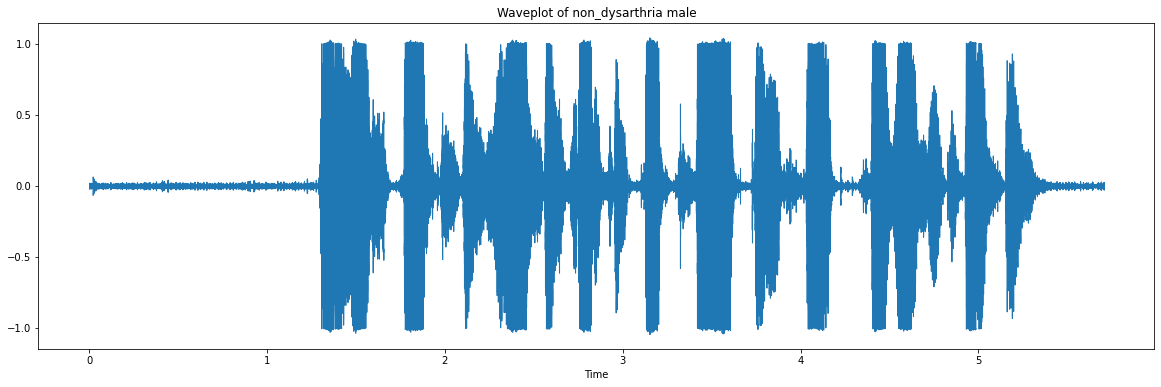

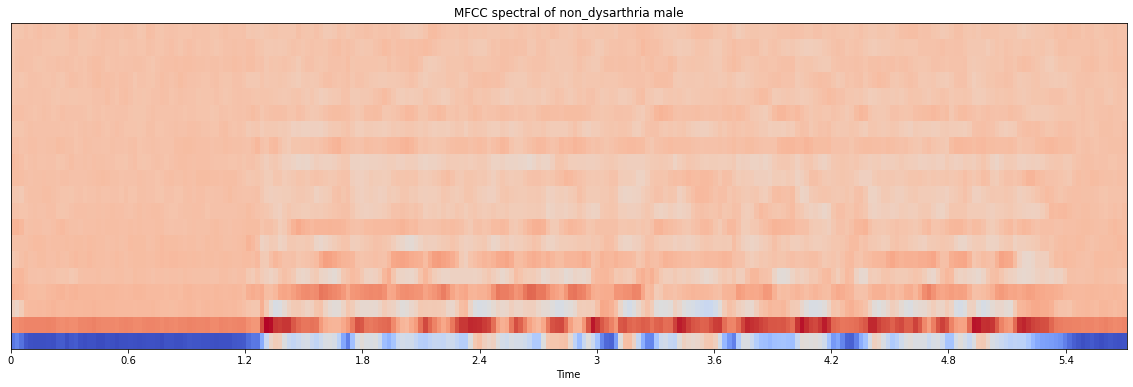

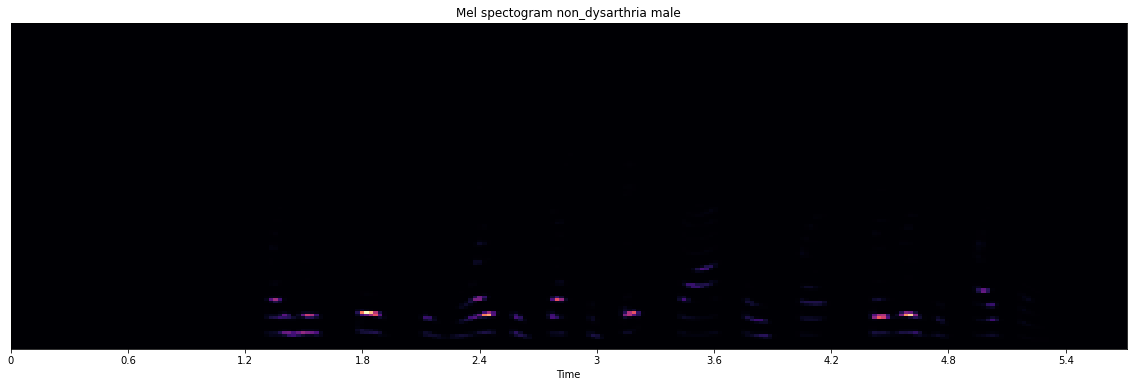

In [16]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')]
waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
spectogram(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

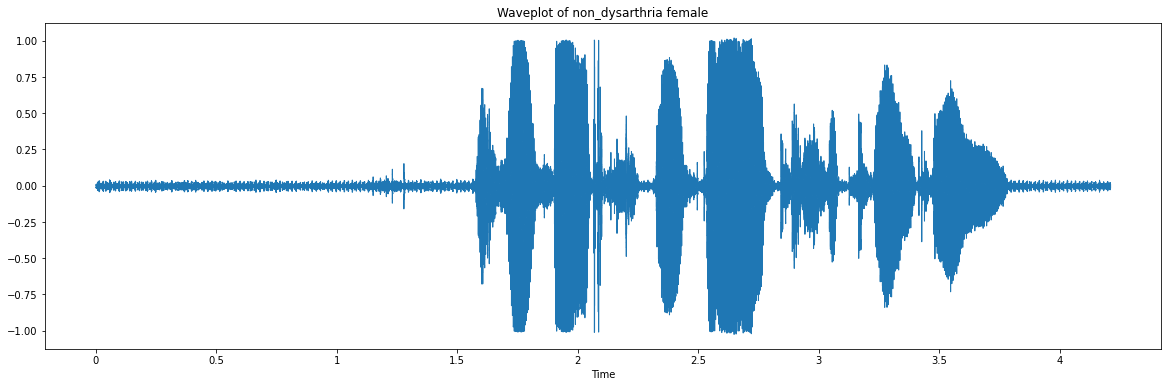

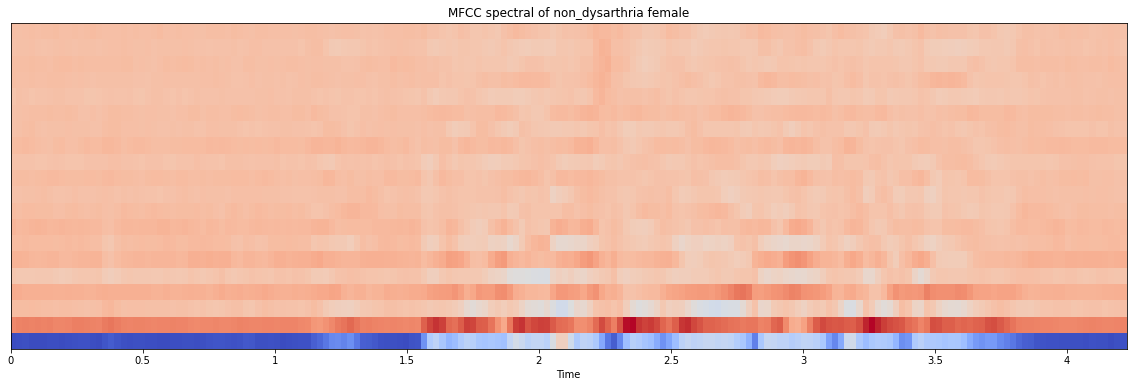

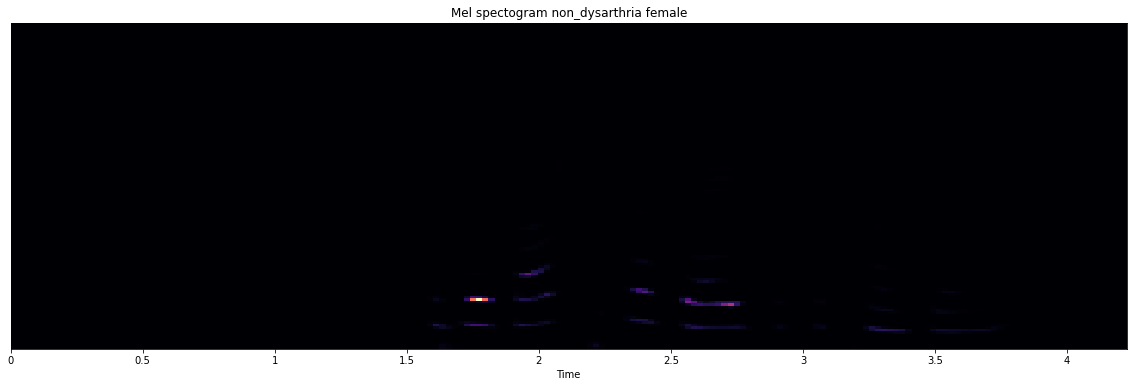

In [17]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')]
waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
spectogram(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

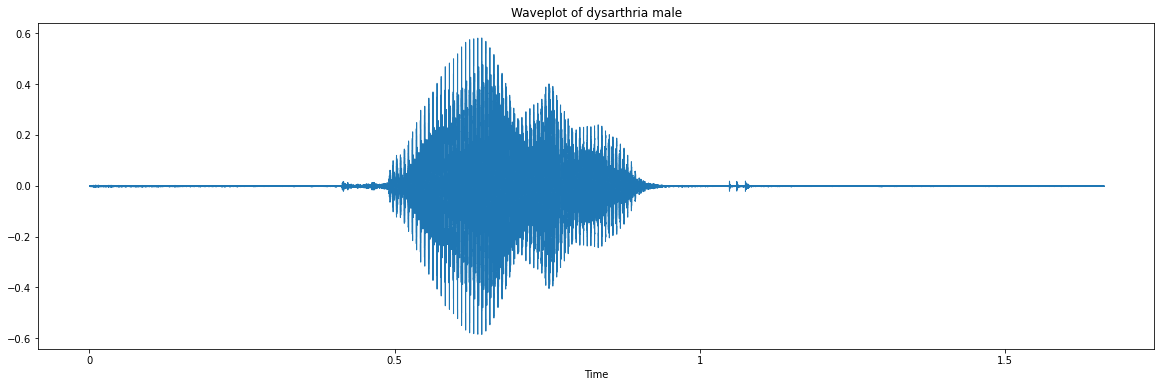

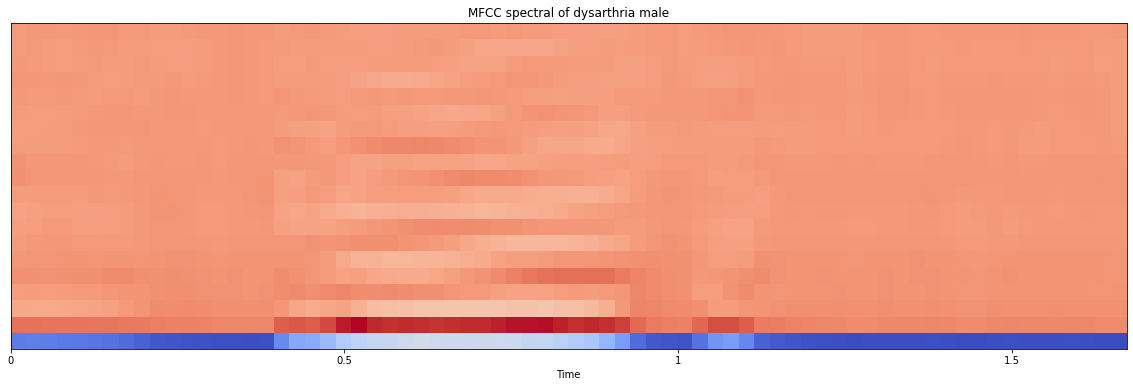

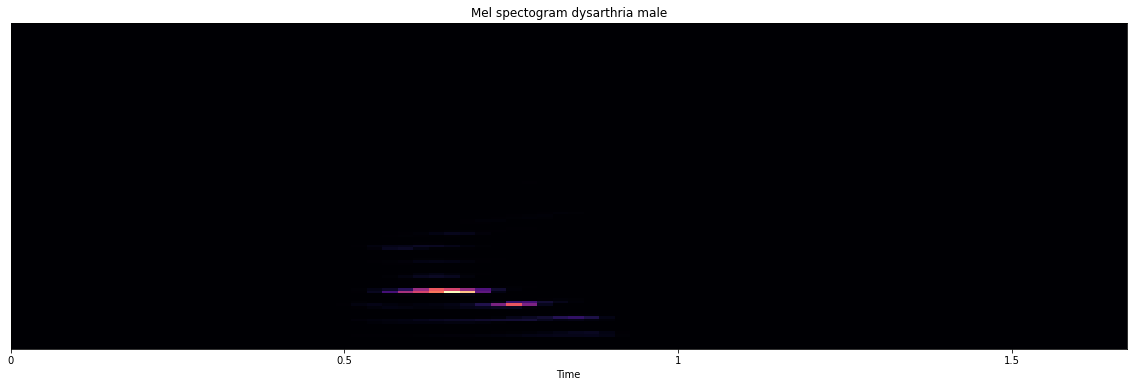

In [18]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')]
waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
spectogram(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

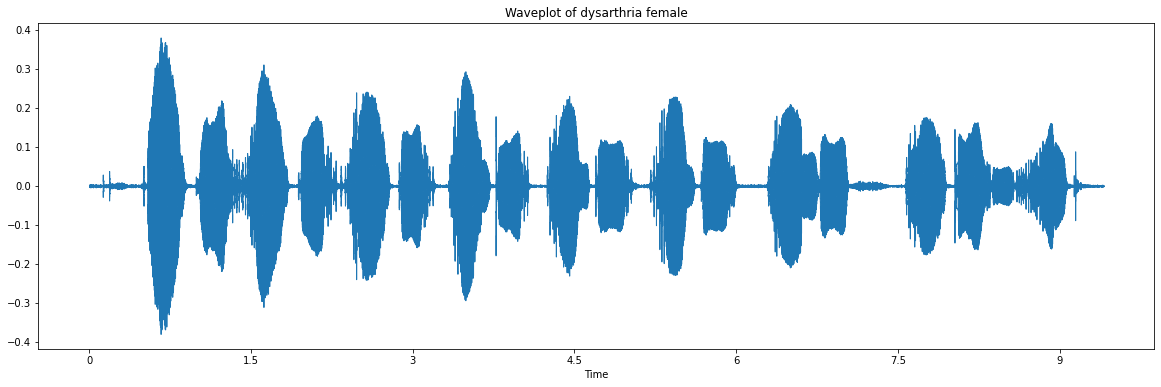

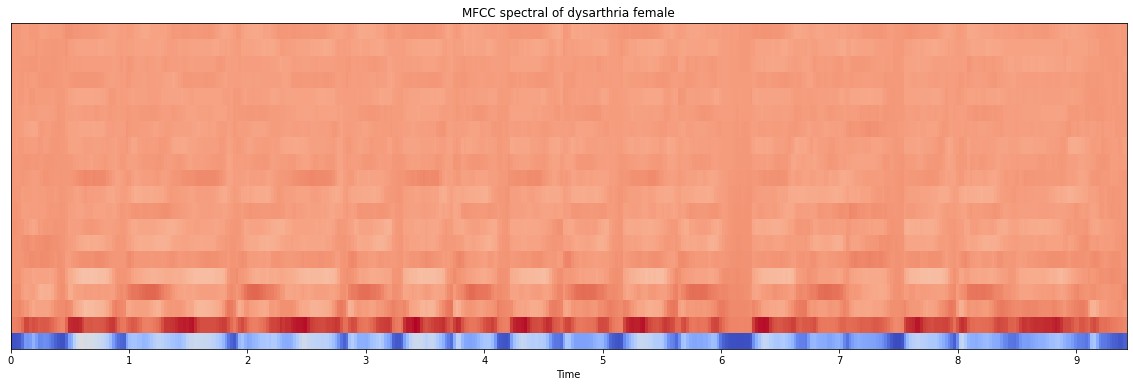

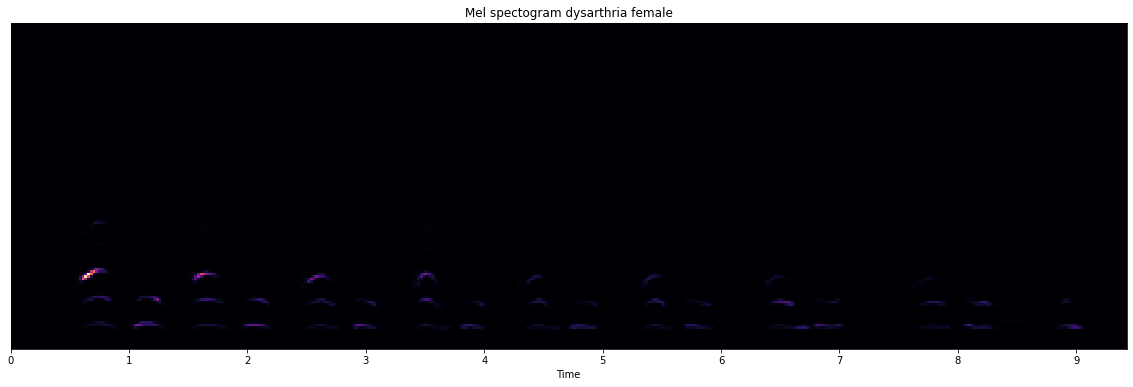

In [19]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')]
waveplot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
spectogram(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

In [20]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x, sr = librosa.load(path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=256)
        mfccs = np.mean(mfccs.T, axis=0)
    except:
        print('Error found in audio')
    return mfccs

In [21]:
%%time
X_df = pd.DataFrame(df['filename'].apply(lambda x: create_mfcc_features(x)).tolist())

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error found in audio


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=209
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=583
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=581
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=185
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=946
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=214
  n_fft, y.shape[-1]


CPU times: user 1min 45s, sys: 1min 22s, total: 3min 8s
Wall time: 1min 42s


In [22]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.202225,104.766289,-19.249100,39.976105,-13.658643,19.425083,-3.005526,7.105515,5.549227,-4.107284,...,1.382414,0.946646,0.779773,1.034225,0.417392,0.073569,0.560806,0.604964,0.170649,-0.222621
1,-301.802734,113.472832,-19.863441,40.374279,-16.921591,21.515228,4.499708,15.208834,7.142713,1.031963,...,1.247081,1.180266,1.058408,1.241004,0.026150,-1.417642,0.081231,0.036446,0.018918,-0.752195
2,-305.652679,116.443367,-27.130651,46.842144,-22.617197,24.739267,3.893429,14.112663,8.798301,0.695419,...,0.969411,0.873021,0.453568,1.044326,-0.004185,-1.480199,0.273740,0.217892,-0.205967,-0.590402
3,-214.418564,121.380379,-38.858505,39.850506,-27.386419,23.892429,-4.153133,8.637264,4.428192,-0.624779,...,1.117963,0.611449,0.945472,0.702243,0.212583,-0.102357,0.021461,0.346264,-0.056452,-0.267683
4,-283.125305,108.704826,-20.648291,46.923939,-15.770267,26.458565,-0.413044,12.762578,9.015738,-2.466657,...,1.457438,1.600919,0.916394,0.728466,0.549834,-0.164512,0.135451,-0.277304,-0.432144,-0.468542


In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()
encoder.fit(df['is_dysarthria'])
y = encoder.transform(df['is_dysarthria'])

In [27]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [28]:
df_post_process=pd.concat([pd.DataFrame(X_df), pd.DataFrame(y)], axis=1)

In [29]:
df_post_process=df_post_process.dropna()

In [30]:
x_df=df_post_process.iloc[:,:-1]

In [31]:
y=df_post_process.iloc[:,-1:]

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x_df), y, test_size=0.1)

In [34]:
x_train.shape

(1799, 128)

In [36]:
x_test.shape

(200, 128)

In [37]:
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_test = x_test.reshape(x_test.shape[0], 16, 8, 1)

In [38]:
len(df['is_dysarthria'].unique())

2

In [42]:
import tensorflow as tf
from tensorflow import keras

In [41]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 8)          0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 8)           0         
                                                                 
 flatten (Flatten)           (None, 64)                0

In [43]:
Adam = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [44]:
x_train.shape

(1799, 16, 8, 1)

In [45]:
y_train.shape

(1799, 1)

In [46]:
history = model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
57/57 [==============================] - 3s 8ms/step - loss: 2.3429 - accuracy: 0.5314 - recall: 0.4966
Epoch 2/20
57/57 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.5859 - recall: 0.6340
Epoch 3/20
57/57 [==============================] - 0s 7ms/step - loss: 0.6579 - accuracy: 0.6059 - recall: 0.7838
Epoch 4/20
57/57 [==============================] - 0s 8ms/step - loss: 0.6195 - accuracy: 0.6342 - recall: 0.7917
Epoch 5/20
57/57 [==============================] - 0s 7ms/step - loss: 0.6114 - accuracy: 0.6609 - recall: 0.7399
Epoch 6/20
57/57 [==============================] - 0s 8ms/step - loss: 0.5775 - accuracy: 0.6887 - recall: 0.7500
Epoch 7/20
57/57 [==============================] - 0s 8ms/step - loss: 0.5572 - accuracy: 0.7282 - recall: 0.7151
Epoch 8/20
57/57 [==============================] - 0s 8ms/step - loss: 0.5188 - accuracy: 0.7493 - recall: 0.7218
Epoch 9/20
57/57 [==============================] - 0s 7ms/step - loss: 0.5088 -

In [47]:
Adam = keras.optimizers.Adam(learning_rate=0.0025,beta_1=0.8,beta_2=0.95)
model.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [48]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
57/57 [==============================] - 2s 10ms/step - loss: 0.3184 - accuracy: 0.8594 - recall_1: 0.8491
Epoch 2/20
57/57 [==============================] - 0s 8ms/step - loss: 0.2987 - accuracy: 0.8805 - recall_1: 0.8716
Epoch 3/20
57/57 [==============================] - 0s 8ms/step - loss: 0.2804 - accuracy: 0.8860 - recall_1: 0.8694
Epoch 4/20
57/57 [==============================] - 0s 7ms/step - loss: 0.2568 - accuracy: 0.8972 - recall_1: 0.8896
Epoch 5/20
57/57 [==============================] - 0s 7ms/step - loss: 0.2609 - accuracy: 0.8994 - recall_1: 0.8975
Epoch 6/20
57/57 [==============================] - 0s 6ms/step - loss: 0.2357 - accuracy: 0.9127 - recall_1: 0.9043
Epoch 7/20
57/57 [==============================] - 0s 8ms/step - loss: 0.2110 - accuracy: 0.9205 - recall_1: 0.9110
Epoch 8/20
57/57 [==============================] - 0s 7ms/step - loss: 0.2260 - accuracy: 0.9216 - recall_1: 0.9122
Epoch 9/20
57/57 [==============================] - 0s 8ms/step

In [49]:
prob_val = model.predict(x_test)

In [50]:
prob_val

array([[1.3447702e-03],
       [9.8656321e-01],
       [9.9993873e-01],
       [9.9996358e-01],
       [9.5870805e-01],
       [9.9998587e-01],
       [9.9997926e-01],
       [9.9999344e-01],
       [9.9834841e-01],
       [9.9992013e-01],
       [6.0800523e-02],
       [7.7502102e-02],
       [1.7774799e-07],
       [9.9958360e-01],
       [9.9552917e-01],
       [9.9977124e-01],
       [9.9785697e-01],
       [2.4254322e-03],
       [4.1860430e-06],
       [9.9899995e-01],
       [9.9810714e-01],
       [9.9960792e-01],
       [9.9998724e-01],
       [9.9968630e-01],
       [4.9066235e-05],
       [6.9910288e-04],
       [4.0883422e-03],
       [6.3614160e-02],
       [9.9447489e-01],
       [2.3067594e-03],
       [9.9932349e-01],
       [9.9999160e-01],
       [9.9989682e-01],
       [1.5696883e-03],
       [3.7618935e-02],
       [9.8993587e-01],
       [5.3770006e-02],
       [3.4084320e-03],
       [8.8696331e-01],
       [9.9999022e-01],
       [9.8840261e-01],
       [4.215294

In [51]:
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score

In [52]:
confusion_matrix(y_test, np.round(prob_val))

array([[ 85,   3],
       [  2, 110]])

In [55]:
roc_auc_score(y_test, model.predict(x_test))

0.9934050324675325

In [56]:
print(recall_score(y_test, np.round(prob_val)))

0.9821428571428571
